    # 0. Install and Import Dependencies

In [ ]:
!pip list

In [ ]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [2]:
import os
from typing import List

import cv2
import tensorflow as tf
from matplotlib import pyplot as plt

In [4]:

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [6]:
# url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
# output = 'data.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('data.zip')
def generate_video_dict(path: str) -> dict[str:List[float]]:
    video_dict = {}
    if not os.path.exists(path):
        raise FileNotFoundError(f'{path} does not exist')
    for file in os.listdir(path):
        if file.endswith('.mpg'):
            cap = cv2.VideoCapture(os.path.join(path, file))
            frames = []
            for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
                ret, frame = cap.read()
                frame = tf.image.rgb_to_grayscale(frame)
                frames.append(frame[190:236, 80:220, :])
            cap.release()
            mean = tf.math.reduce_mean(frames)
            std = tf.math.reduce_std(tf.cast(frames, tf.float16))
            video_dict[file] = tf.cast((frames - mean), tf.float16) / std
    return video_dict


cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')

lip_cascade = cv2.CascadeClassifier(haar_model)


def generate_mounth_video_dict(path: str) -> dict[str:List[float]]:
    video_dict = {}
    if not os.path.exists(path):
        raise FileNotFoundError(f'{path} does not exist')
    for file in os.listdir(path):
        if file.endswith('.mpg'):
            print(file)
            cap = cv2.VideoCapture(os.path.join(path, file))
            frames = []
            for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
                ret, frame = cap.read()

                faces = lip_cascade.detectMultiScale(frame, 1.1, 5)
                # if not recognized, try to ignore the frame
                if len(faces) == 0:
                    continue
                for (x, y, w, h) in faces:
                    mouth_roi = frame[y + int(h / 2):y + h, x:x + w, :]
                    frame = cv2.resize(mouth_roi, (140, 46))
                    frame = tf.image.rgb_to_grayscale(frame)
                frames.append(frame)
            cap.release()
            print(frames[0].shape)
            mean = tf.math.reduce_mean(frames)
            std = tf.math.reduce_std(tf.cast(frames, tf.float16))
            video_dict[file] = tf.cast((frames - mean), tf.float16) / std
    return video_dict


def load_video(path: str) -> List[float]:
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236, 80:220, :])
    cap.release()  # close the video file

    mean = tf.math.reduce_mean(frames)  # compute the mean
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))  # compute the standard deviation
    return tf.cast((frames - mean), tf.float32) / std  # normalize to zero mean and unit variance


video_dict = None

In [7]:
import sys

video_dict = generate_mounth_video_dict('./data/s1')
print(len(video_dict))
# print memory in video_dict
dict_size = sys.getsizeof(video_dict)
print(f"Size of video_dict: {dict_size} bytes")


pgad8n.mpg


2024-04-10 16:13:21.770799: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-10 16:13:21.770965: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-10 16:13:21.771080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

(46, 140, 1)


2024-04-10 16:13:22.598247: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


srwvzn.mpg
(46, 140, 1)
bgwh9s.mpg
(46, 140, 1)
lrik4p.mpg
(46, 140, 1)
pbav3s.mpg
(46, 140, 1)
sgac2n.mpg
(46, 140, 1)
lrid9s.mpg
(46, 140, 1)
pbbj1a.mpg
(46, 140, 1)
pgij9s.mpg
(46, 140, 1)
sbwo1s.mpg
(46, 140, 1)
pwbk3a.mpg
(46, 140, 1)
swwv6n.mpg
(46, 140, 1)
pwic9s.mpg
(46, 140, 1)
srbo4p.mpg
(46, 140, 1)
bgbb2p.mpg
(46, 140, 1)
srin7a.mpg
(46, 140, 1)
lwie7a.mpg
(46, 140, 1)
pgbr3a.mpg
(46, 140, 1)
lgbf9s.mpg
(46, 140, 1)
pgby5s.mpg
(46, 140, 1)
pwwe2p.mpg
(46, 140, 1)
prax1a.mpg
(46, 140, 1)
lgir9s.mpg
(46, 140, 1)
lwafzp.mpg
(46, 140, 1)
bbwgzn.mpg
(46, 140, 1)
srwi2n.mpg
(46, 140, 1)
swwv9a.mpg
(46, 140, 1)
prip1s.mpg
(46, 140, 1)
bram2n.mpg
(46, 140, 1)
lbid2n.mpg
(46, 140, 1)
prwj8n.mpg
(46, 140, 1)
lgil7a.mpg
(46, 140, 1)
swbv4p.mpg
(46, 140, 1)
prii9a.mpg
(46, 140, 1)
lbwr3s.mpg
(46, 140, 1)
prap6p.mpg
(46, 140, 1)
prap7a.mpg
(46, 140, 1)
srbh9s.mpg
(46, 140, 1)
pgaq7s.mpg
(46, 140, 1)
lwws6p.mpg
(46, 140, 1)
bgan5s.mpg
(46, 140, 1)
pgid6p.mpg
(46, 140, 1)
brbt2p.mpg
(46, 

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


AttributeError: 'NoneType' object has no attribute 'keys'

In [42]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz "]

In [43]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' '] (size =28)


In [44]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 ' ']

In [45]:
char_to_num(['n', 'i', 'c', 'k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [46]:
num_to_char([14, 9, 3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [47]:
# def load_alignments(path:str) -> List[str]: 
#     with open(path, 'r') as f: 
#         lines = f.readlines() 
#     tokens = []
#     for line in lines:
#         line = line.split()
#         if line[2] != 'sil': 
#             tokens = [*tokens,' ',line[2]]
#     return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]
def init_alignments(path: str) -> dict[str:List[str]]:
    alignments = {}
    if not os.path.exists(path):
        raise FileNotFoundError(f'{path} does not exist')
    for file in os.listdir(path):
        if file.endswith('.align'):
            with open(os.path.join(path, file), 'r') as f:
                lines = f.readlines()
            tokens = []
            for line in lines:
                line = line.split()
                if line[2] != 'sil':
                    tokens = [*tokens, ' ', line[2]]
            alignments[file] = char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[
                               1:]
    return alignments


alignments_dict = init_alignments('./data/alignments/s1')


In [48]:
print(len(alignments_dict))

1000


In [49]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    # file_name = path.split('\\')[-1].split('.')[0]
    video_path = f'{file_name}.mpg'
    alignment_path = f'{file_name}.align'
    frames = video_dict.get(video_path)
    alignments = alignments_dict.get(alignment_path)

    return frames, alignments

In [50]:
test_path = './data/s1/bbal6n.mpg'

In [51]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [52]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [53]:
print(len(frames))

75


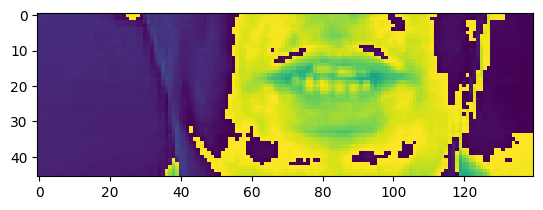

In [54]:
plt.imshow(frames[40][:, :, 0])


In [23]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 27,  2, 12, 21,  5, 27,  1, 20, 27, 12, 27, 19,  9, 24,
       27, 14, 15, 23])>

In [55]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [56]:
def mappable_function(path: str) -> List[str]:
    result = tf.py_function(load_data, [path], (
        tf.float16, tf.int64))  # py_function is used to convert a python function to a tensorflow function
    return result

# 2. Create Data Pipeline

In [57]:
from matplotlib import pyplot as plt

In [58]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')  # list all the files
data = data.shuffle(500, reshuffle_each_iteration=False)  # shuffle is used to shuffle the data
data = data.map(mappable_function)  # 75 frames, 46x140 pixels, 1 channel
data = data.padded_batch(8, padded_shapes=([75, None, None, None], [40]))  # pad the data 75 frames 40 characters
data = data.prefetch(tf.data.AUTOTUNE)  # prefetch the data
# Added for split 
train = data.take(100)
test = data.skip(100)

In [59]:
print(len(data))
print(len(train))
print(len(test))

125
100
25


In [60]:
frames, alignments = data.as_numpy_iterator().next()

In [30]:
len(frames)

4

In [31]:
sample = data.as_numpy_iterator()

In [32]:
val = sample.next();
val[0]

array([[[[[ 1.433  ],
          [ 1.433  ],
          [ 1.433  ],
          ...,
          [ 0.3843 ],
          [ 0.3843 ],
          [ 0.3843 ]],

         [[ 1.433  ],
          [ 1.433  ],
          [ 1.433  ],
          ...,
          [ 0.3843 ],
          [ 0.3843 ],
          [ 0.3843 ]],

         [[ 1.362  ],
          [ 1.362  ],
          [ 1.362  ],
          ...,
          [ 0.3843 ],
          [ 0.3494 ],
          [ 0.3494 ]],

         ...,

         [[ 0.978  ],
          [ 0.978  ],
          [ 0.978  ],
          ...,
          [ 0.03494],
          [ 0.     ],
          [ 0.     ]],

         [[ 0.978  ],
          [ 0.978  ],
          [ 0.978  ],
          ...,
          [ 0.     ],
          [ 0.     ],
          [ 0.     ]],

         [[ 0.978  ],
          [ 0.978  ],
          [ 0.978  ],
          ...,
          [ 0.     ],
          [ 0.     ],
          [ 8.91   ]]],


        [[[ 1.327  ],
          [ 1.327  ],
          [ 1.362  ],
          ...,
        

In [32]:
# imageio.mimsave('./animation.gif', val[0][0], fps=10) # can't handle this data type:(1,1,1), <f4
# imageio.mimsave('./animation.gif', val[0][0].astype(np.uint8), fps=10)


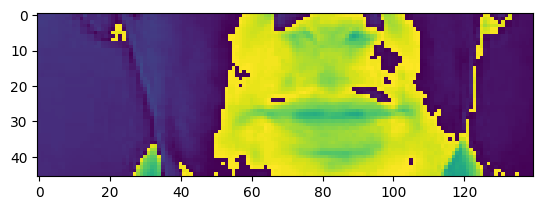

In [33]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [34]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set green at p three again'>

# 3. Design the Deep Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, TimeDistributed, \
    Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.src.applications import ResNet50

In [36]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [37]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75, 46, 140, 1), padding='same'))  # 128 filters, 3x3 kernel
model.add(Activation('relu'))  # activation function
model.add(MaxPool3D((1, 2, 2)))  # max pooling

model.add(Conv3D(256, 3, padding='same'))  # 256 filters, 3x3 kernel
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(TimeDistributed(Flatten()))  # flatten the output of the previous layer

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))  # bidirectional LSTM
model.add(Dropout(0.5))  # dropout layer

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))

model.add(
    Dense(char_to_num.vocabulary_size() + 1, kernel_initializer='he_normal', activation='softmax'))  # output layer


In [61]:


base_model = ResNet50(weights=None, include_top=False, input_shape=(46, 140, 1))

# If you wish to Freeze layers
for layer in base_model.layers:
    layer.trainable = True

model = Sequential()
model.add(base_model)
# model = Sequential()
# model.add(Conv3D(128, 3, input_shape=(75, 46, 140, 1), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool3D((1, 2, 2)))
# 
# model.add(Conv3D(256, 3, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool3D((1, 2, 2)))
# 
# model.add(Conv3D(75, 3, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool3D((1, 2, 2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size() + 1, kernel_initializer='he_normal', activation='softmax'))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 5, 2048)        23581440  
                                                                 
 time_distributed_1 (TimeDi  (None, 2, 10240)          0         
 stributed)                                                      
                                                                 
 bidirectional_3 (Bidirecti  (None, 2, 256)            10617856  
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 2, 256)            0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 2, 256)            394240    
 onal)                                                           
                                                      

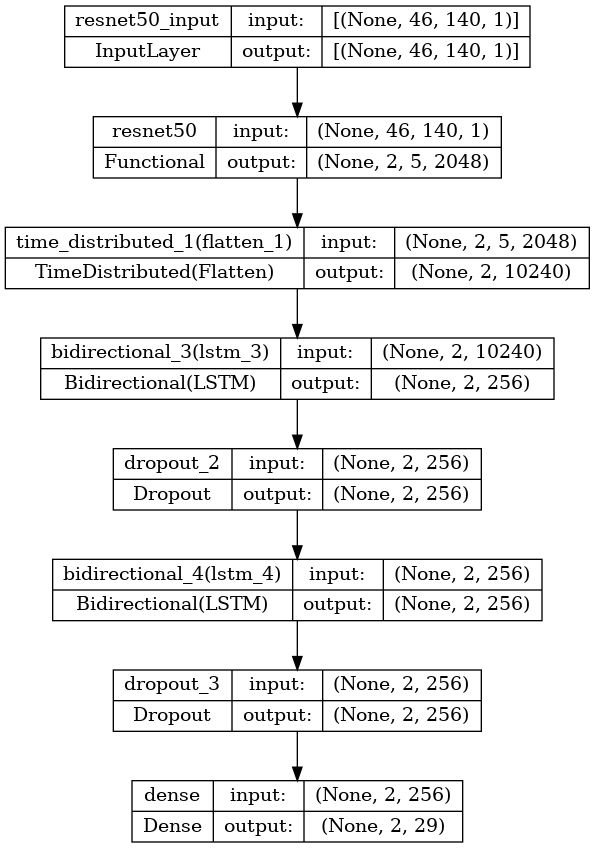

In [62]:

model.summary()
# save as a picture
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_resnet50.png', show_shapes=True, show_layer_names=True)

In [1]:
5 * 17 * 75

6375

In [63]:
yhat = model.predict(val[0])

NameError: name 'val' is not defined

In [64]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0], axis=1)])

NameError: name 'yhat' is not defined

In [41]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'ttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt'>

In [67]:
model.input_shape

(None, 46, 140, 1)

In [66]:
model.output_shape

(None, 2, 29)

# 4. Setup Training Options and Train

In [68]:
def scheduler(epoch, lr):  # learning rate scheduler
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [69]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [70]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None):
        try:
            data = self.dataset.next()
            yhat = self.model.predict(data[0])
            decoded = tf.keras.backend.ctc_decode(yhat, [75, 75, 75, 75], greedy=False)[0][0].numpy()
            for x in range(len(yhat)):
                print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
                print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
                print('~' * 100)
        except StopIteration:
            self.dataset = self.dataset.as_numpy_iterator()
            data = self.dataset.next()
            yhat = self.model.predict(data[0])
            decoded = tf.keras.backend.ctc_decode(yhat, [75, 75, 75, 75], greedy=False)[0][0].numpy()
            for x in range(len(yhat)):
                print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
                print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
                print('~' * 100)

In [71]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [73]:
checkpoint_callback = ModelCheckpoint(os.path.join('models', 'checkpoint50'), monitor='loss',
                                      save_weights_only=True, )

In [74]:
schedule_callback = LearningRateScheduler(scheduler)

In [75]:
example_callback = ProduceExample(test)

In [76]:
model.fit(train, validation_data=test, epochs=60, callbacks=[checkpoint_callback, schedule_callback])

# caculate the loss

Epoch 1/60


ValueError: in user code:

    File "/home/liazylee/jobs/venv_python/lip_reading/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/liazylee/jobs/venv_python/lip_reading/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/liazylee/jobs/venv_python/lip_reading/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/liazylee/jobs/venv_python/lip_reading/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/liazylee/jobs/venv_python/lip_reading/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/liazylee/jobs/venv_python/lip_reading/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 46, 140, 1), found shape=(None, 75, None, None, None)


In [74]:
# model.evaluate(test)
loss_history = model.history.history

dict_keys(['loss', 'val_loss', 'lr'])


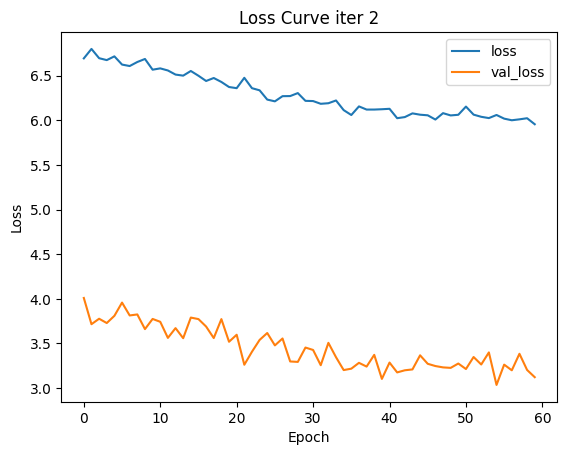

In [75]:
# draw the loss curve
print(loss_history.keys())
plt.plot(loss_history['loss'], label='loss')
plt.plot(loss_history['val_loss'], label='val_loss')
# x label and y label
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve iter 2')
plt.legend(loc='upper right')
# filename = 'loss_curve_resNet50.png'
# plt.savefig(filename)      
plt.show()


# 5. Make a Prediction 

In [ ]:
# url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
# output = 'checkpoints.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('checkpoints.zip', 'models')

In [76]:
model.load_weights('models/checkpoint2')


In [77]:
## test on the test data
test_loss = model.evaluate(test)
print(f'Baseline The Test loss: {test_loss}')
# accuracy
accuracy = 100 - test_loss
print(f'Baseline Test accuracy: {accuracy}')
# test on the train data
train_loss = model.evaluate(train)
print(f'Baseline The Train loss: {train_loss}')


25/25 [==============================] - 5s 201ms/step - loss: 3.1596
Baseline The Test loss: 3.1595547199249268
Baseline Test accuracy: 96.84044528007507
100/100 [==============================] - 20s 201ms/step - loss: 3.2549
Baseline The Train loss: 3.2549242973327637


In [78]:
test_data = test.as_numpy_iterator()

In [79]:
sample = test_data.next()

In [80]:
yhat = model.predict(sample[0])

1/1 [==============================] - 0s 215ms/step


In [81]:
print('~' * 100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green by b one soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set green at v seven again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place green in q three soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place green at q eight please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay white by z four now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green in l seven again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place blue at o nine soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin green with b four now'>]

In [86]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75, 75, 75, 75, 75, 75, 75, 75], greedy=True)[0][0].numpy()

In [87]:
print('~' * 100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin green by b one soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set gren at seven again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place green in thre sooon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place gren at eight please'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay white by four now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay gren in l seven again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place blue at nine soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin green with four now'>]

# Test on a Video

In [ ]:
sample = load_data(tf.convert_to_tensor('./data/s1/bbal6n.mpg'))

In [158]:
print('~' * 100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

In [159]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>]

In [160]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

1/1 [==============================] - 1s 610ms/step


In [161]:
print('~' * 100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>]